# Problem Definition:  


In today's society, online transaction has become inevitable due to advancement in the use of technology, increase in worldwide communication and need for a seamless interaction across platforms. Despite the enabled ease online transaction provides, detecting fraudulent transactions is one of the major problems faced in many industries, most especially in the banking and retail sectors. Therefore to curb significant damage and loss to organizations, employing efficient fraud detection algorithms such as machine learning  techniques will play a vital role in the detection of fraudulent transactions. 


Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management, asset management and payments services, headquartered in London, UK. Blossom Bank wants to build a Machine Learning model to predict online payment fraud.

This study aims to develop 4 machine learning models, namely: Logistics Regression, Random Forest Classifier, Decision Tree Classifier & KNeighbours Classifier, analyze their performances based on the capacity & the volume of the datasets provided; to predict online payment fraud. 

### Objectives

* Visualize the relationships between labels in the dataset using Exploratory Data Analysis (EDA).

* Evaluate the dataset by using machine learning (ML) to determine models that better predict fraudulent online transaction.

* Based on findings, proffer recommendations on how the business can optimise online transactions. 

# Data Inspection

In [1]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np

#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the data and display header

data = pd.read_csv(r"C:\Users\Chinny Akpa\Desktop\10Alytics Machine learning\Online Payment Fraud Detection.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### Data Description

Data was sourced from 10Alytics repository. The below column reference are as follows:

• step: represents a unit of time where 1 step equals 1 hour
    
• type: type of online transaction
    
• amount: the amount of the transaction
    
• nameOrig: customer starting the transaction
    
• oldbalanceOrg: balance before the transaction
    
• newbalanceOrig: balance after the transaction
    
• nameDest: recipient of the transaction
    
• oldbalanceDest: initial balance of recipient before the transaction
    
• newbalanceDest: the new balance of the recipient after the transaction
    
• isFraud: fraud transaction

In [3]:
#check shape of the entire dataframe using .shape attribute
data.shape

(1048575, 10)

This dataset contains 1048575 rows and 10 columns.  

In [4]:
#use info() method to check columns and datatypes of each column in your data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


This section contains information in the dataset. It is important to note that there are no null values in this dataset.

In [5]:
# Statistical Analysis of the data
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [6]:
# Missing Values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

There are no missing value(s) in this dataset

In [63]:
#Display labels in the dataset
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'trans_amount', 'step_grp'],
      dtype='object')

These are the column headers in the dataset

<AxesSubplot:title={'center':'Missing data visualization'}>

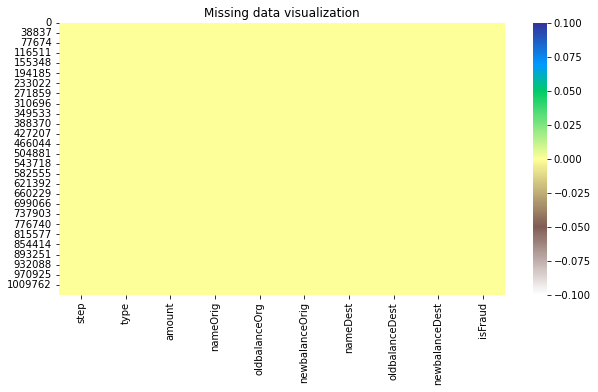

In [8]:
# visualize the missing data

plt.figure(figsize=(10,5))
plt.title("Missing data visualization")
sns.heatmap(data.isnull(), cbar=True, cmap="terrain_r")

In [9]:
#display last rows in the dataset
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [10]:
# Statistical description of data in the step column
data.step.describe()

count    1.048575e+06
mean     2.696617e+01
std      1.562325e+01
min      1.000000e+00
25%      1.500000e+01
50%      2.000000e+01
75%      3.900000e+01
max      9.500000e+01
Name: step, dtype: float64

In [11]:
# Maximum value in the Amount column
data.amount.max()

10000000.0

In [12]:
# Minimum value in the Amount column
data.amount.min()

0.1

In [13]:
# middle value in the amount column
data.amount.median()

76343.33

In [15]:
#Value counts for target column
data.isFraud.value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [16]:
#Check unique transaction types
data.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [17]:
# check how many transactions per type
data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

# Data Visualization

This section visualizes the relationships in the data set.

### Univariate Analysis

Charts where only one variable (column) is plotted at a time. 

Text(0, 0.5, 'Count')

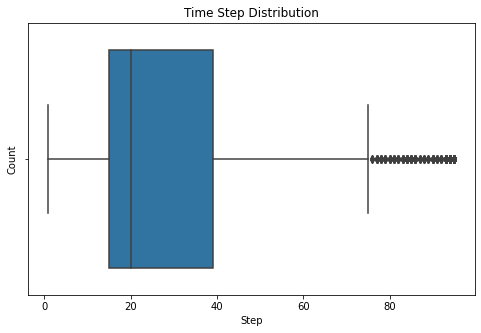

In [18]:
# Visualize data in step column

plt.figure(figsize=(8,5))
sns.boxplot(x= 'step', data = data)
plt.title('Time Step Distribution')
plt.xlabel('Step')
plt.ylabel('Count')

This gives a summary of the set of data values in the step column with a median of 20hrs. The description above denotes that the distribution of this observation is postively skewed.
Most transactions were completed between 20hrs to 40hrs,
with a few that took about 75hrs to 95hrs to be completed.

Text(0, 0.5, 'Count')

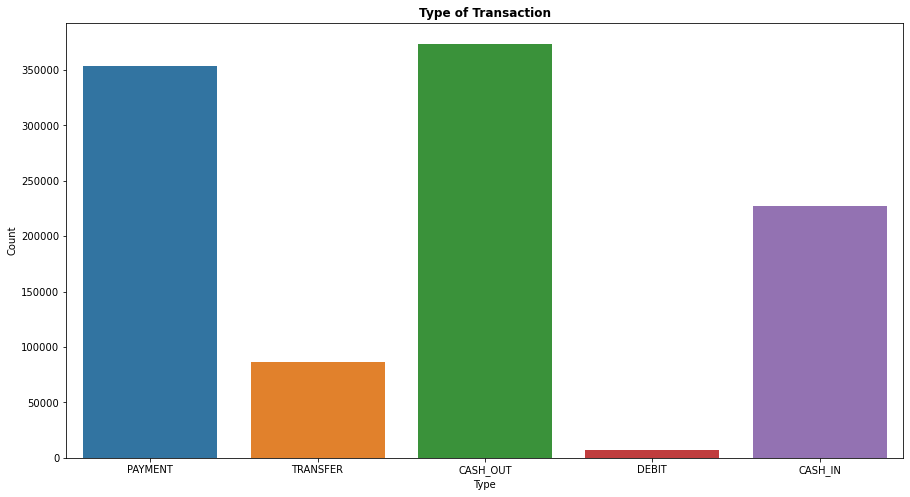

In [19]:
#Distribution of values in the type column.

plt.figure(figsize=(15,8))
sns.countplot(x= 'type', data = data)
plt.title('Type of Transaction', weight = 'bold').set_fontsize('12')
plt.xlabel('Type')
plt.ylabel('Count')

#show_values(a)

The observation recorded Cash Out, Payment and Cash In as the most occuring online transaction type, respectively; while, Transfer and Debit types scored least. 

Text(0, 0.5, 'isFraud?')

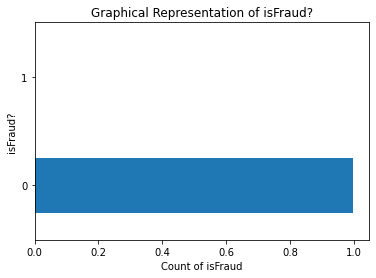

In [20]:
#Distribution of values in the target column. Use value_counts(normalize=True)

data["isFraud"].value_counts(normalize=True).plot.barh()
plt.title("Graphical Representation of isFraud?")
plt.xlabel("Count of isFraud")
plt.ylabel("isFraud?")


Distribution of the target value "isFraud" is not normalised.

Text(0.5, 1.0, 'Transaction by Amount')

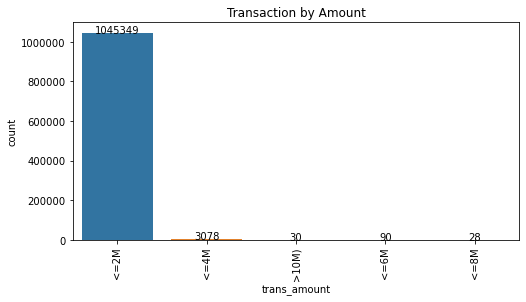

In [21]:
# Create a function to group  and visualise amount column

def amt(amount):
    if amount <= 2000000:
        return "<=2M"
    elif amount <=4000000:
        return "<=4M"
    elif amount <=6000000:
        return "<=6M"
    elif amount <= 8000000:
        return "<=8M"
    else: 
        return ">10M)"

    
# Create a new column for amount
data["trans_amount"] = data["amount"].apply(amt)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "trans_amount", data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Transaction by Amount')

Most transaction amount is below 2M.

Text(0.5, 1.0, 'Step Group')

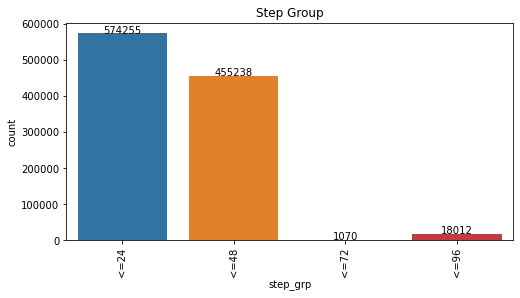

In [40]:
# Create a function to group and visualise Step column
def amt(amount):
    if amount <= 24:
        return "<=24"
    elif amount <=48:
        return "<=48"
    elif amount <=72:
        return "<=72"
    elif amount <=96:
        return "<=96"
    else: 
        return ">100)"

    
# Create a new column for step column
data["step_grp"] = data["step"].apply(amt)


# Display values for each category
fig, ax1 = plt.subplots(figsize = (8,4))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax =ax1, x = "step_grp", data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
plt.title('Step Group')

Data drawn from graph above shows that most transactions were completed within 24hrs to 48hrs.
While 574,255 transactions were completed within 24hrs or less,  455,238 were completed within 48hrs. 
The rest span between 72 to 96 hrs.

Text(0, 0.5, 'Count')

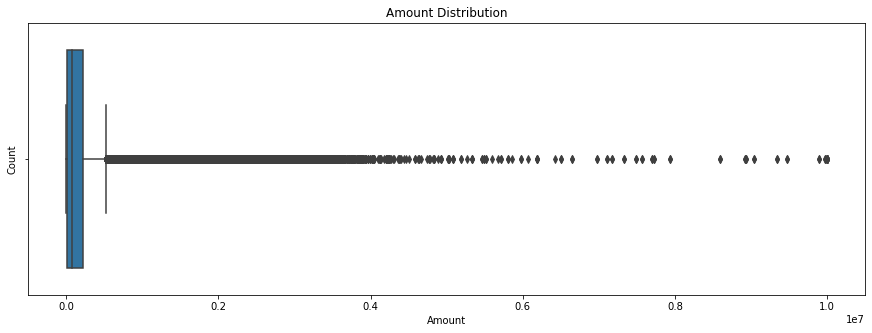

In [22]:
plt.figure(figsize=(15,5))
sns.boxplot(x= 'amount', data = data)
plt.title('Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')

The plot above displays a graphical summary of the set of data value in the amount label.

Text(0, 0.5, 'Count')

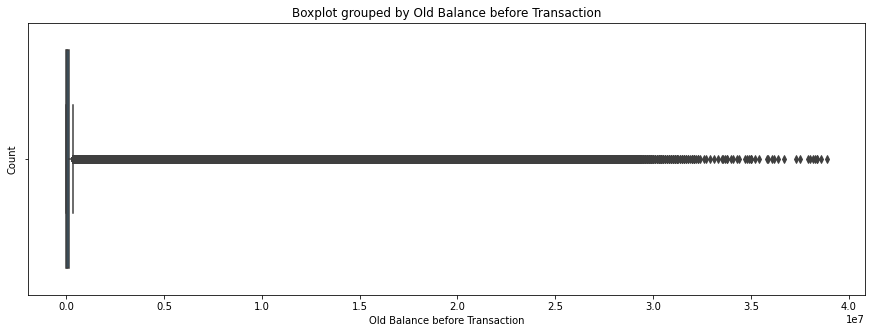

In [23]:
#Distribution of values in the Balance Before Transaction.

plt.figure(figsize=(15,5))
sns.boxplot(x= 'oldbalanceOrg', data = data)
plt.title('Boxplot grouped by Old Balance before Transaction')
plt.xlabel('Old Balance before Transaction')
plt.ylabel('Count')     

The plot above displays a graphical summary of the set of data value in the "oldbalanceOrg" label.

<AxesSubplot:>

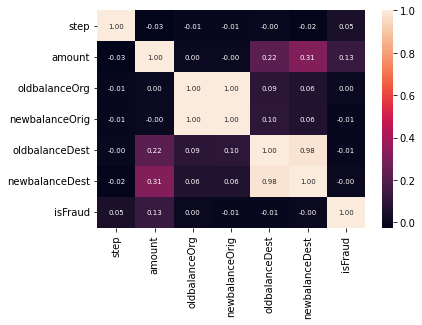

In [24]:
# Correlation Analysis
corel = data.corr()

sns.heatmap(corel, cbar=True, annot=True, fmt=".2f", annot_kws={'size': 7})

From the correlation matrix above, it can be deduced that "Old balance dest" has a positive significant relationship 
on "new balance dest" and vice versa. Though there is little to no significant relationship between the target variable 'isFraud' and other variables, the 'amount' interestingly shows a positive relationship with te former.

### Bivariate Analysis

Create charts where you plot only two variables at a time on a chart. 

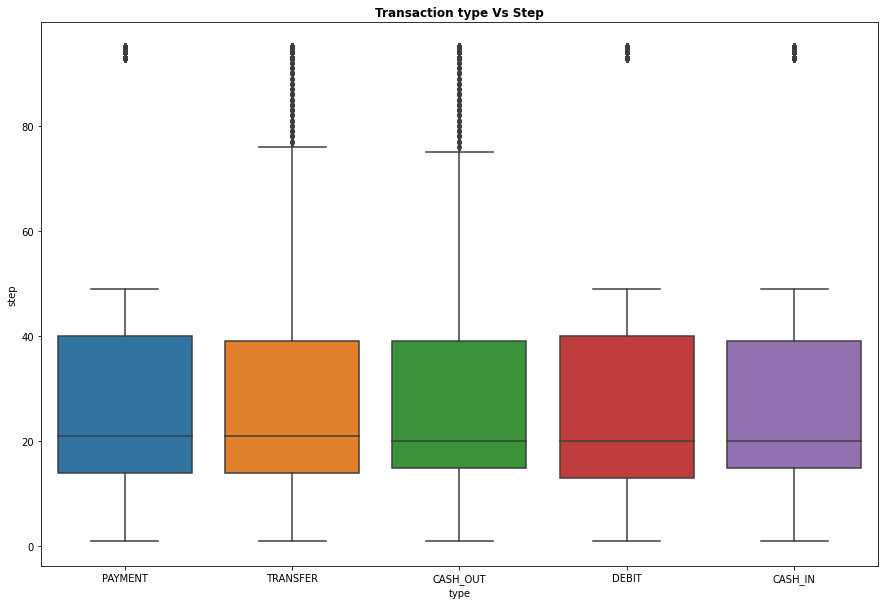

In [25]:
#Visualise Transaction Type Vs Step

fig, ax1 = plt.subplots(figsize = (15, 10))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(x = 'type', y ='step', data = data)
plt.title('Transaction type Vs Step', weight='bold', fontsize = 12)
plt.show(ax)

The plot above displays a graphical summary of  time taken for a transaction process to be completed per type.
While most transactions in each category were completed between 16 to 40hrs
'Debit and payment' type seem to have taken the longest hrs to complete on the average.
'Transfer and cash Out' type also recorded the most unusual longer hrs of transaction (between 75hrs to 96 hrs) in comparison to other types.

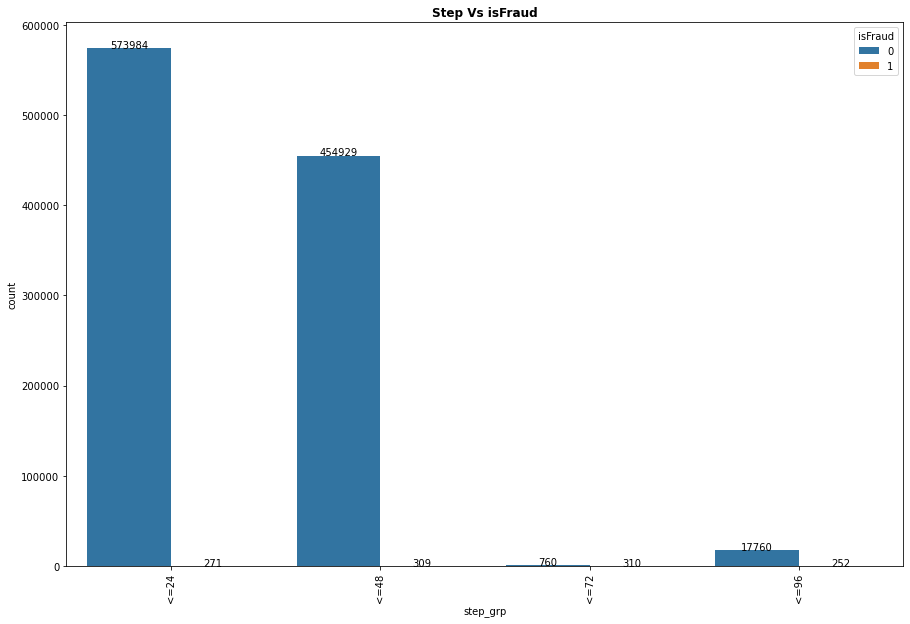

In [46]:
#Visualise Step Vs Fraud

fig, ax1 = plt.subplots(figsize = (15, 10))
plt.ticklabel_format(style='plain')
viz = sns.countplot(ax=ax1, x = 'step_grp', hue = 'isFraud', data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha="center")
    plt.title('Step Vs isFraud', weight='bold', fontsize = 12)

Nearly all transaction across each time frame were flagged as not fraudlent

Text(0.5, 1.0, 'Transaction Amount Vs Step')

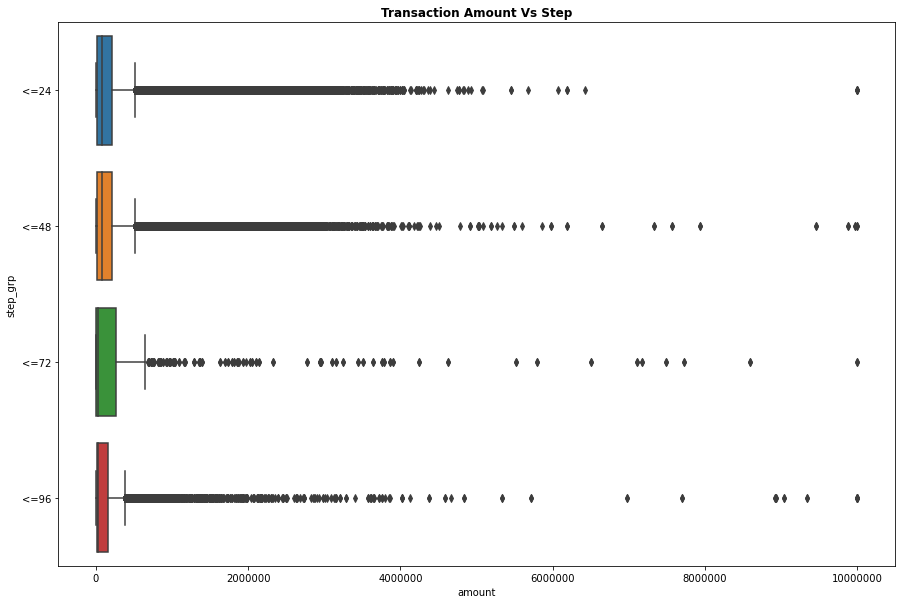

In [50]:
#Visualise Transaction Amount Vs Step group

fig, ax1 = plt.subplots(figsize = (15, 10))
plt.ticklabel_format(style='plain')
ax = sns.boxplot(ax=ax1, x = 'amount', y ='step_grp', data = data)
plt.title('Transaction Amount Vs Step', weight='bold', fontsize = 12)

Most transaction across each time frame of 24hrs to 96hrs fall below 2 million 
with very few between 20 million to 10 million.

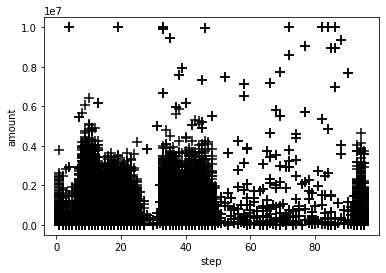

In [28]:
#Visualise Transaction Amount Vs Step
ax = data.plot.scatter(x='step', y='amount', color='black', marker='+', s=100)

The plot further complements the "step Vs Amount' previously
depicted, this is to better illustrate the spread of time consumed to process various amount across hours

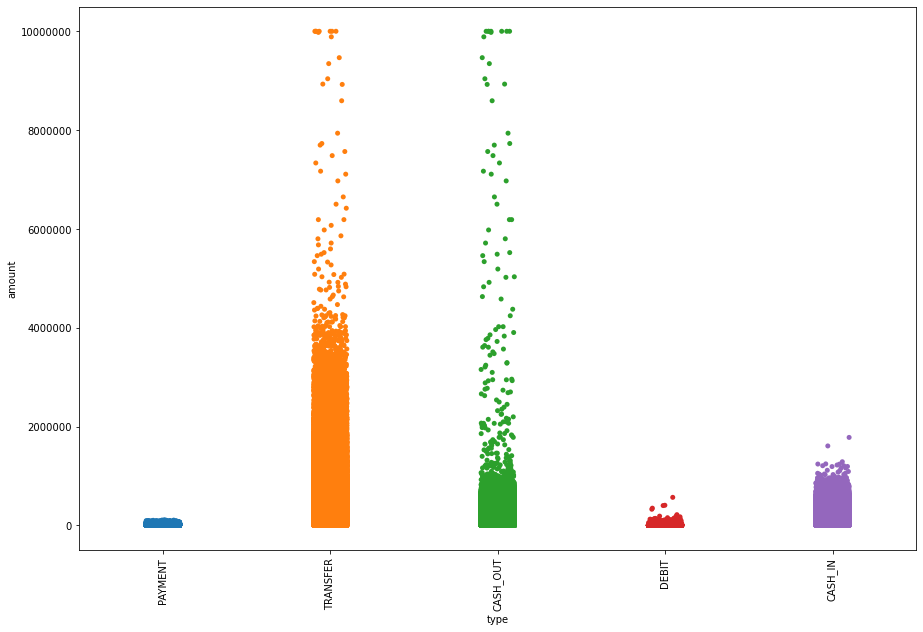

In [26]:
#Visualise Transaction Type Vs Transaction Amount

fig, ax1 = plt.subplots(figsize = (15, 10))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax=ax1, x = 'type', y = 'amount', data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha-"center")
    plt.title('Transaction type Vs Amount', weight='bold', fontsize = 12)


'Transfer and Cash Out' recorded the highest values in amount while 'Cash In, Debit and Payment' online transaction type follow suit.

<AxesSubplot:title={'center':'OldbalanceOrg Vs NewbalanceOrig'}, xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

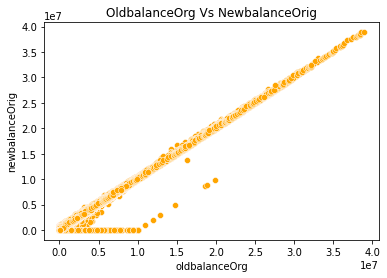

In [37]:
#Visualize OldbalanceOrg by NewbalanceOrig

plt.title("OldbalanceOrg Vs NewbalanceOrig")
sns.scatterplot(x=data["oldbalanceOrg"], y=data["newbalanceOrig"], color='orange')

This illustrates a linear relationship between sender's balance before transaction and balance
of the recipient account after transaction.

<AxesSubplot:title={'center':'OldbalanceDest Vs NewbalanceDest'}, xlabel='newbalanceDest', ylabel='oldbalanceDest'>

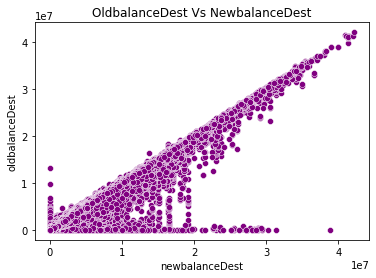

In [38]:
#Visualize OldbalanceDest by NewbalanceDest

plt.title("OldbalanceDest Vs NewbalanceDest")
sns.scatterplot(x=data["newbalanceDest"], y=data["oldbalanceDest"], color='purple')

This illustrates a linear relationship between initial balance of recipient before the transaction the new balance of the
recipient after the transaction.

<AxesSubplot:title={'center':'New Balance Orig Vs New Balance Dest'}, xlabel='oldbalanceOrg', ylabel='oldbalanceDest'>

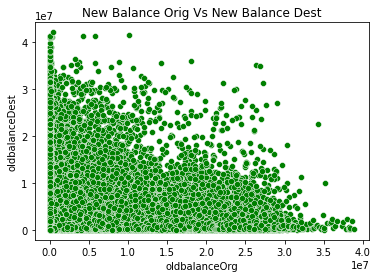

In [34]:
#Visualize New Balance Orig by New Balance Dest

plt.title("New Balance Orig Vs New Balance Dest")
sns.scatterplot(x=data["oldbalanceOrg"], y=data["oldbalanceDest"], color='green')

<AxesSubplot:title={'center':'New Balance Orig Vs New Balance Dest'}, xlabel='newbalanceDest', ylabel='newbalanceOrig'>

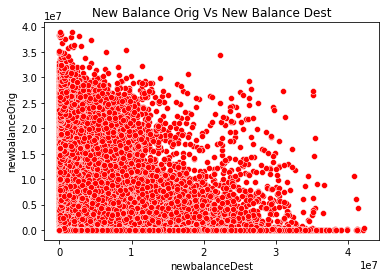

In [32]:
#Visualize New Balance Orig by New Balance Dest

plt.title("New Balance Orig Vs New Balance Dest")
sns.scatterplot(x=data["newbalanceDest"], y=data["newbalanceOrig"], color='red')

This shows a comparison of amount left off sender's account after transaction and the new balance of the recipient after the transaction.

### Multivariate Analysis
Visualise more than two variables at a time on a chart.

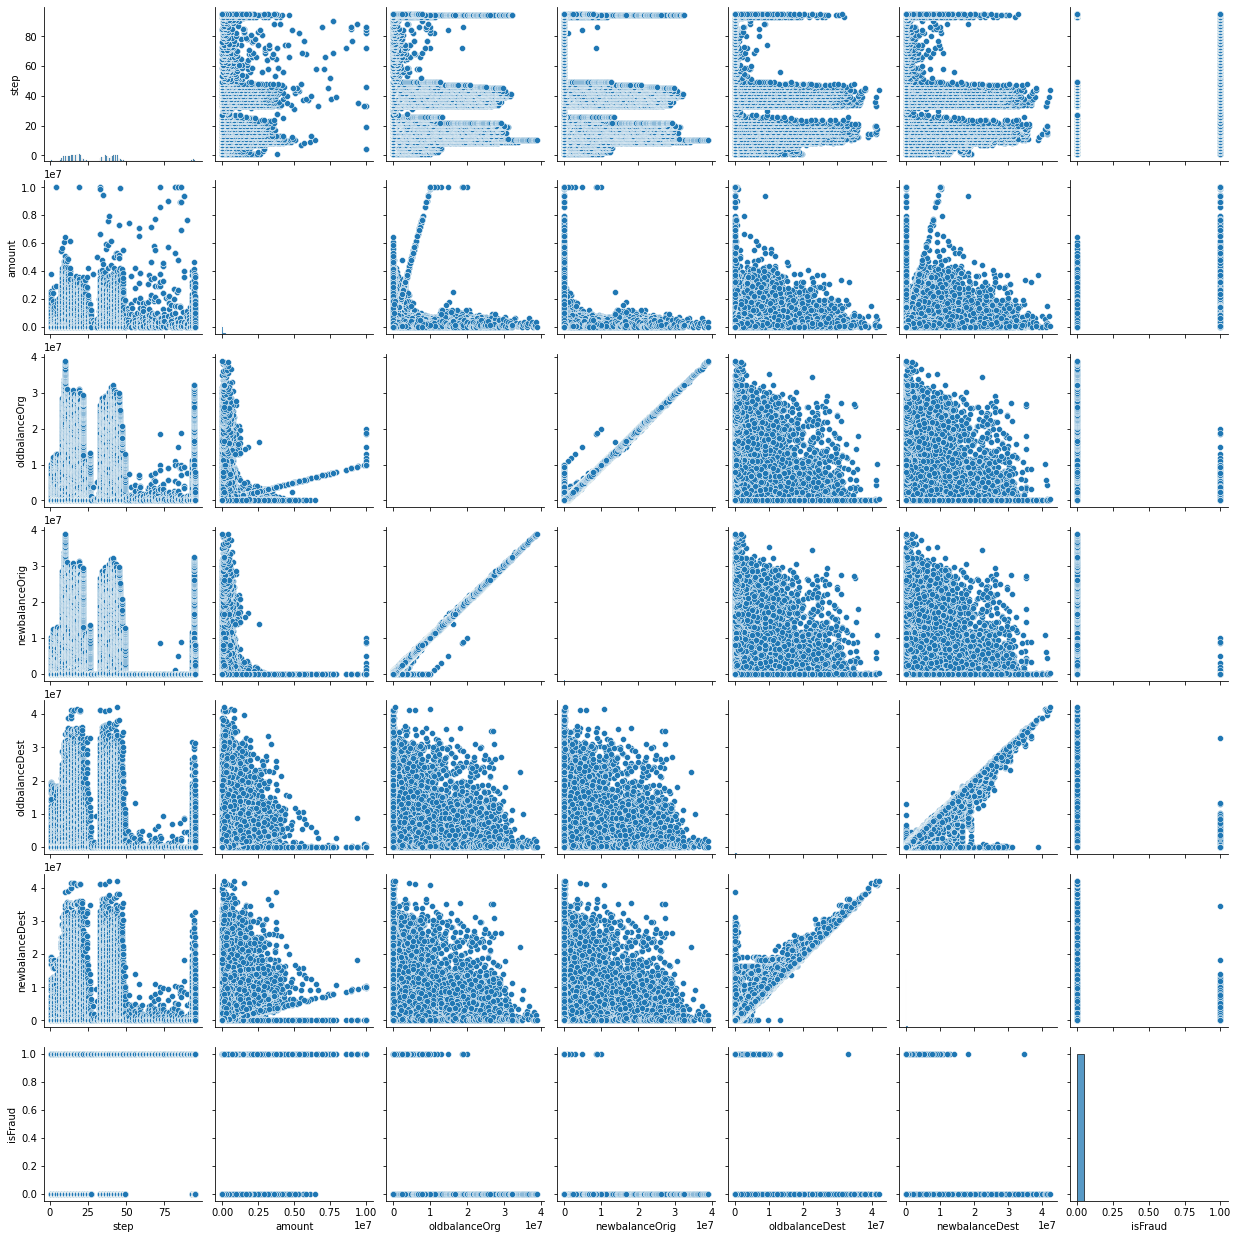

In [36]:
#multivariate analysis cells

sns.pairplot(data)

This graphical represents the correlation matrix and compares values across all the data labels to find their relationship against each other.

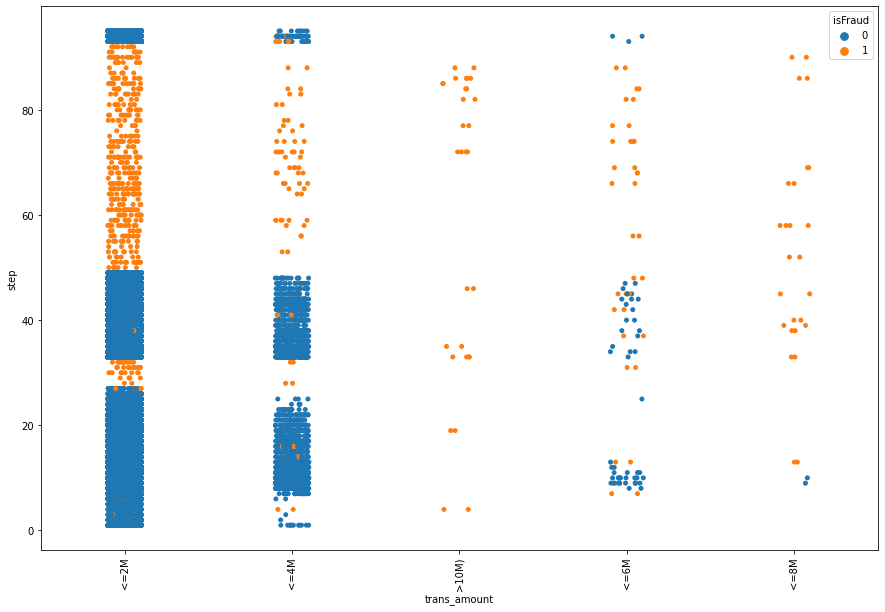

In [114]:
#Visualise Transaction Type Vs Transaction Amount

fig, ax1 = plt.subplots(figsize = (15, 10))
plt.ticklabel_format(style='plain')
viz = sns.stripplot(ax=ax1, x = 'trans_amount', y = 'step', hue = 'isFraud', data = data)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
for i in viz.patches:
    height = i.get_height()
    viz.text(i.get_x() + i.get_width()/2., height + 0.1, height, ha-"center")
    plt.title('Transaction Amount Vs Step by isFraud', weight='bold', fontsize = 12)

Most transaction equivalent 2 million or less were flagged as fraudulent between 48hrs to 92 hrs. It is also important to note that
transactions equivalent to 10 million across all time frame were all flagged as fraudulent and nearly all 
transaction equivalent to 8 million were flagged as fraudulent transaction. Could it be that most transaction that takes 
48hrs or higher to be completed are flagged as fraudulent? 

# Feature Engineering

### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.

In [52]:
categorical = ['type']

In [53]:
#use pd.get_dummies() for one hot encoding
#replace pass with your code

categories_dummies = pd.get_dummies(data[categorical])

#view what you have done
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [54]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and categories_dummies as a list of their names
#pop out documentation for pd.concat() to clarify
data_2 = pd.concat([data,categories_dummies], axis=1)

#check what you have done
print(data_2.shape)
data_2.head()

(1048575, 17)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,trans_amount,step_grp,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,<=2M,<=24,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,<=2M,<=24,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,<=2M,<=24,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,<=2M,<=24,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,<=2M,<=24,0,0,0,1,0


In [56]:
#remove the initial categorical columns now that we have encoded them
#use the list called categorical do delete all the initially selected columns at once
#replace pass in the code below
data_2 = data_2.drop(categorical,axis=1)

In [57]:
data_2.drop(['nameOrig', 'nameDest', 'trans_amount', 'step_grp'], axis=1, inplace=True)

In [58]:
print(data_2.shape)
data_2.head()

(1048575, 12)


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [59]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   amount          1048575 non-null  float64
 2   oldbalanceOrg   1048575 non-null  float64
 3   newbalanceOrig  1048575 non-null  float64
 4   oldbalanceDest  1048575 non-null  float64
 5   newbalanceDest  1048575 non-null  float64
 6   isFraud         1048575 non-null  int64  
 7   type_CASH_IN    1048575 non-null  uint8  
 8   type_CASH_OUT   1048575 non-null  uint8  
 9   type_DEBIT      1048575 non-null  uint8  
 10  type_PAYMENT    1048575 non-null  uint8  
 11  type_TRANSFER   1048575 non-null  uint8  
dtypes: float64(5), int64(2), uint8(5)
memory usage: 61.0 MB


# Model Selection, Training and Validation

### Select Target and Features

In this section, we will train and evaluate your models

In [60]:
# Data = x
x = data_2.drop(['isFraud'], axis=1)

# Label = y
y = data_2["isFraud"]

In [61]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [62]:
x.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


### Import ML algorithms and initialize them

In [54]:
# Machine Learning

#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# ML Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
# Load four ML algorithms
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()

classifiers = [rf, kn, lr, dt]

### Train Test Split

In [57]:
#split into training and validation sets using a 20% split ratio

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [58]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


For RandomForestClassifier, Accuracy score is 0.999766349569654 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209526
           1       0.80      0.98      0.88       189

    accuracy                           1.00    209715
   macro avg       0.90      0.99      0.94    209715
weighted avg       1.00      1.00      1.00    209715



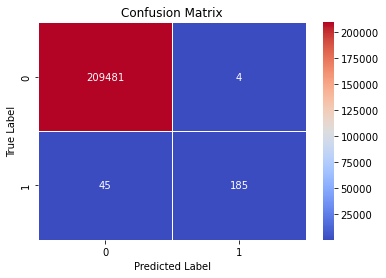


For KNeighborsClassifier, Accuracy score is 0.9993801111031638 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209561
           1       0.55      0.82      0.66       154

    accuracy                           1.00    209715
   macro avg       0.78      0.91      0.83    209715
weighted avg       1.00      1.00      1.00    209715



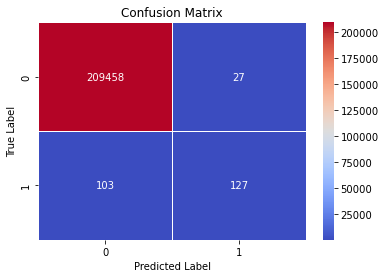


For LogisticRegression, Accuracy score is 0.9990320196457096 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209598
           1       0.31      0.62      0.41       117

    accuracy                           1.00    209715
   macro avg       0.66      0.81      0.71    209715
weighted avg       1.00      1.00      1.00    209715



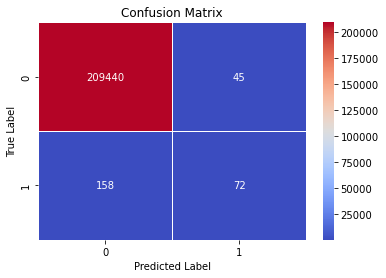


For DecisionTreeClassifier, Accuracy score is 0.9996185299096393 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209489
           1       0.82      0.83      0.82       226

    accuracy                           1.00    209715
   macro avg       0.91      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



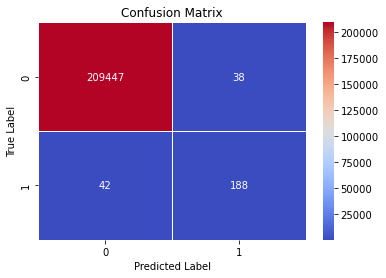

In [59]:
# Train Test Split (Training on 80% while Testing is 20%)

#create function to train a model and evaluate accuracy
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test))
    plot_confusion_matrix(y_test,prediction)
    
    #loop through each model, training in the process
for model in classifiers:
    trainer(model,X_train,y_train,X_test,y_test)

### Inspect Feature Importances

In [60]:
#Fit random forest Classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Get the feature importances from the Random Forest model 
rf.feature_importances_

array([2.68167093e-01, 1.86637508e-01, 1.89377565e-01, 3.15827238e-02,
       1.04030196e-01, 1.79016523e-01, 2.75530112e-03, 1.53738766e-02,
       1.83327016e-04, 2.29347880e-03, 2.05824082e-02])

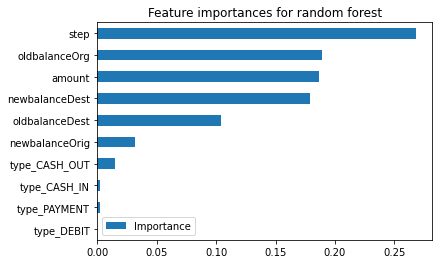

In [62]:
# Sort and Plot feature importances 
RF_importances = pd.DataFrame(data = rf.feature_importances_,index = X_test.columns, columns=['Importance'])

#plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for random forest')
plt.show()

In [63]:
# Top 10 importances
RF_importances[:10].sort_values(by='Importance').index.values

array(['type_DEBIT', 'type_PAYMENT', 'type_CASH_IN', 'type_CASH_OUT',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount',
       'oldbalanceOrg', 'step'], dtype=object)

#  Findings

* With an unbalanced dataset, accuracy model is not the best metric, therefore, we have to decide
  whether the priority is precision or recall.


* Logistics Regression model seem to be the most predictive model.


* Why choose Recall metric?  

    As shown in the metric Logistics Regression model predicted the highest recall rate -
    having a high measure of relevant results i.e. false negatives by
    capturing fraudulent transactions in real time. False negatives are much more harmful 
    than false positives therefore recall should be prioritized.

    For instance, the penalty for mislabeling a fraudulent transaction
    as legitimate is having a user’s money 
    stolen, which the bank is forced to reimburse and as such, incurs losses to them. On the other hand, the 
    penalty for mislabeling a 
    legitimate transaction as fraud is having the customer's account frozen out of their finances and unable to make payments.  
    In such case, the customer can easily have the penalty overturned by reporting to the bank. 
    

* Features such as 'Step, Amount, Old Balance Org, New Balance Dest' etc had the most impact on the data modelling.       

# Summary


* In conclusion, it is believed that it will be extremely important for the organisation under study to capture 
    as many fraudulent transactions as possible, in real time, this is because they are obligated to protect their customers 
   finances though at the same time not mislabeling too many transactions so customers can reliably carry out their online 
   transaction activities seamlessly and conveniently without having their transactions declined. 